### Importing Libraries

In [121]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### Get the data

In [122]:
df = pd.read_csv('german_credit_data.csv', index_col=0)

### Exploratory Data Analysis 

In [123]:
exploration = df.copy()

In [124]:
exploration.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [125]:
exploration.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   int64 
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   object
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [126]:
exploration.isnull().sum()

Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
Risk                  0
dtype: int64

In [127]:
exploration["Job"] = exploration["Job"].astype("object")

In [128]:
exploration.describe()

,Age,Credit amount,Duration
count,1000.000000,1000.000000,1000.000000
mean,35.546000,3271.258000,20.903000
std,11.375469,2822.736876,12.058814
min,19.000000,250.000000,4.000000
25%,27.000000,1365.500000,12.000000
50%,33.000000,2319.500000,18.000000
75%,42.000000,3972.250000,24.000000
max,75.000000,18424.000000,72.000000


In [129]:
exploration.describe(include="object")

,Sex,Job,Housing,Saving accounts,Checking account,Purpose,Risk
count,1000,1000,1000,817,606,1000,1000
unique,2,4,3,4,3,8,2
top,male,2,own,little,little,car,good
freq,690,630,713,603,274,337,700


#### More Insight on the target

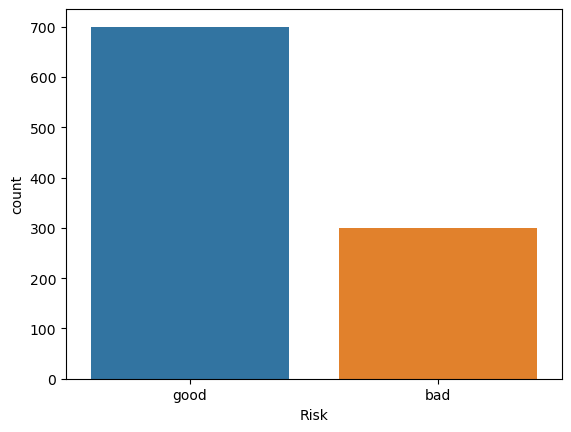

In [130]:
sns.countplot(data=exploration, x="Risk", hue="Risk")
plt.show()

#### Study of each feature and its correlation with the target

Age

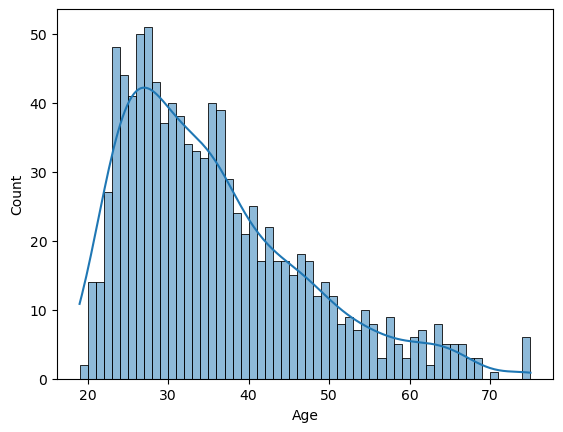

In [131]:
sns.histplot(data=exploration, x="Age", binwidth=1, kde=True)
plt.show()

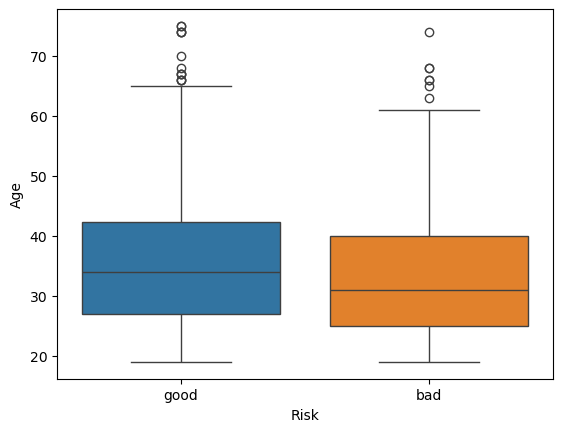

In [132]:
sns.boxplot(data=exploration, y="Age", x="Risk", hue="Risk")
plt.show()

Credit Amount

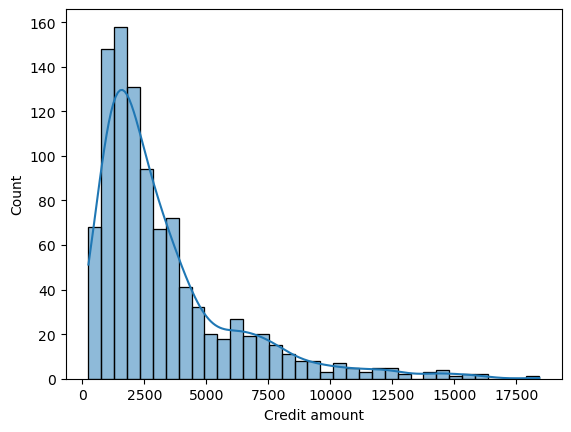

In [133]:
sns.histplot(data=exploration, x="Credit amount", kde=True)
plt.show()

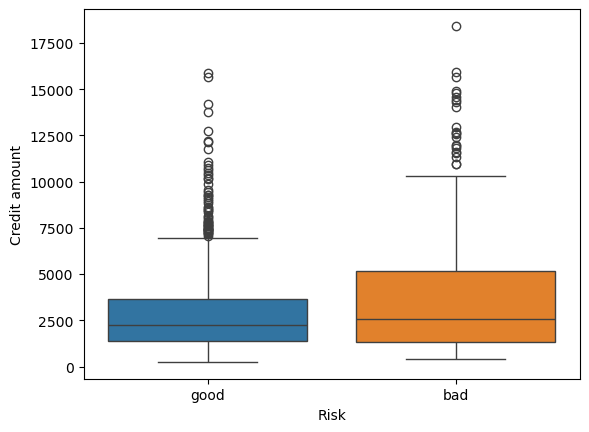

In [134]:
sns.boxplot(data=exploration, y="Credit amount", x="Risk", hue="Risk")
plt.show()

Duration

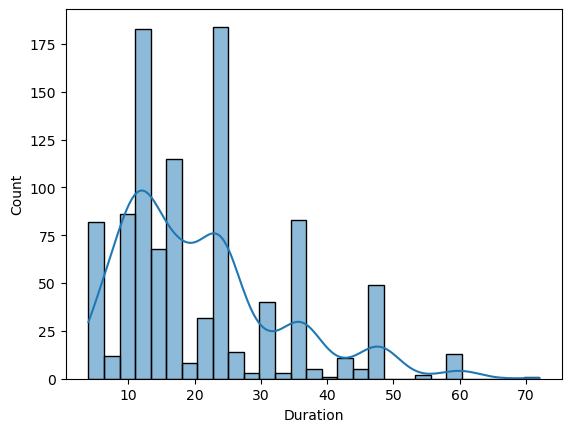

In [135]:
sns.histplot(data=exploration, x="Duration", kde=True)
plt.show()

Categorical variables 

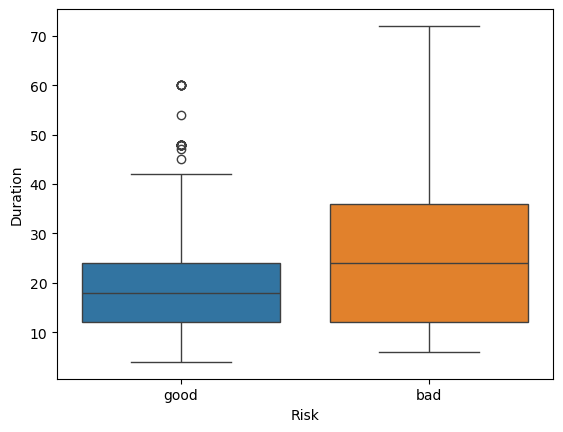

In [136]:
sns.boxplot(data=exploration, y="Duration", x="Risk", hue="Risk")
plt.show()

Sex
male      690
female    310
Name: count, dtype: int64


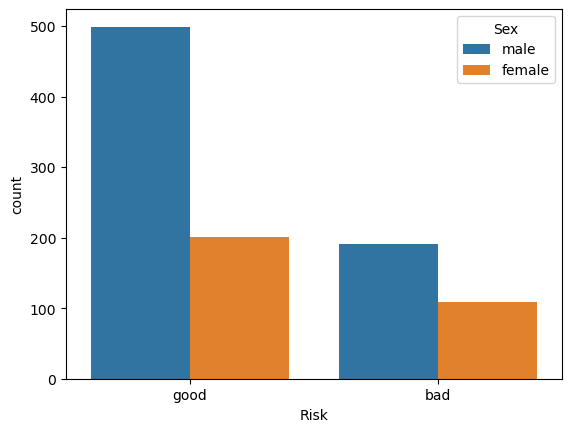

Job
2    630
1    200
3    148
0     22
Name: count, dtype: int64


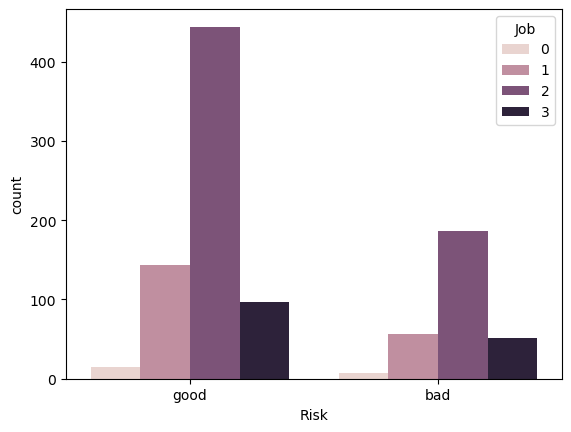

Housing
own     713
rent    179
free    108
Name: count, dtype: int64


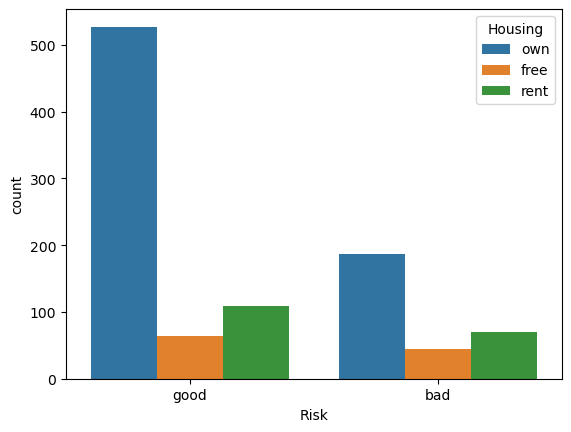

Saving accounts
little        603
moderate      103
quite rich     63
rich           48
Name: count, dtype: int64


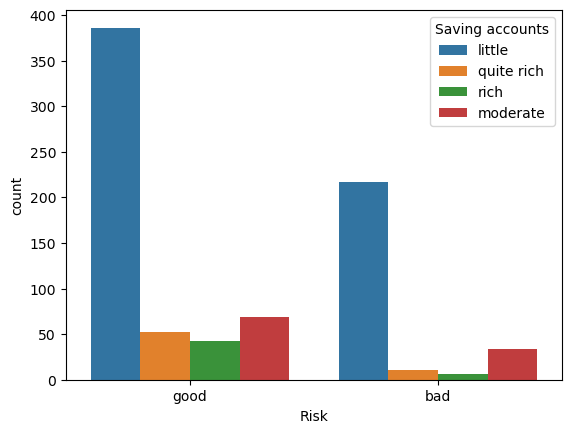

Checking account
little      274
moderate    269
rich         63
Name: count, dtype: int64


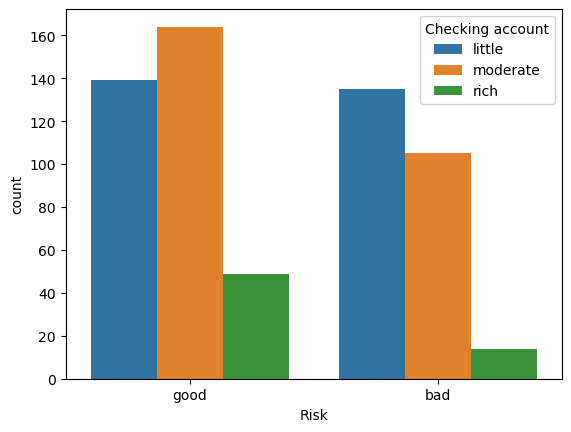

Purpose
car                    337
radio/TV               280
furniture/equipment    181
business                97
education               59
repairs                 22
domestic appliances     12
vacation/others         12
Name: count, dtype: int64


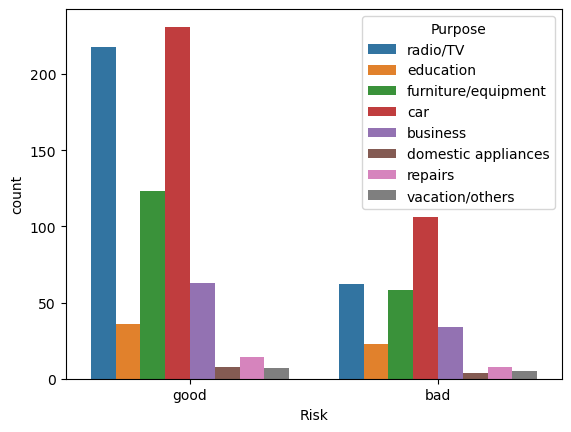

Risk
good    700
bad     300
Name: count, dtype: int64


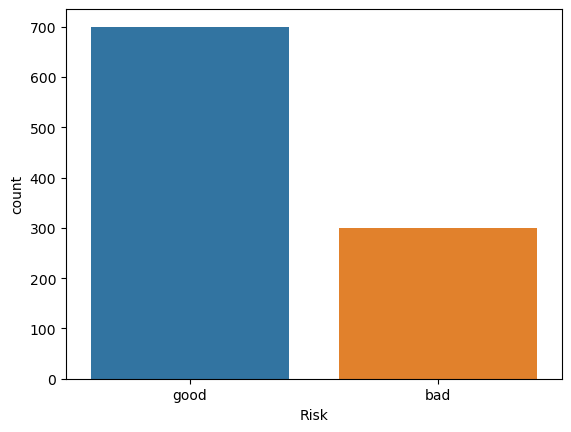

In [137]:
for col in exploration.select_dtypes(include="object").columns:
    print(exploration[col].value_counts())
    sns.countplot(data=exploration, x="Risk", hue=col)
    plt.show()

#### Data Cleaning 

In [138]:
clean_data = exploration.copy()

Outliers

In [139]:
def outlier_thresholds(dataframe, variable):
    quartile1 = dataframe[variable].quantile(0.25)
    quartile3 = dataframe[variable].quantile(0.75)
    interquantile_range = quartile3 - quartile1
    up_limit = quartile3 + 1.5 * interquantile_range
    low_limit = quartile1 - 1.5 * interquantile_range
    return low_limit, up_limit


def has_outliers(dataframe, num_col_names, plot=False):
    variable_names = []
    for col in num_col_names:
        low_limit, up_limit = outlier_thresholds(dataframe, col)
        if dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].any(axis=None):
            number_of_outliers = dataframe[(dataframe[col] > up_limit) | (dataframe[col] < low_limit)].shape[0]
            print(col, ":", number_of_outliers)
            variable_names.append(col)
            if plot:
                sns.boxplot(x=dataframe[col])
                plt.show()
    return variable_names


has_outliers(clean_data, clean_data.select_dtypes(include=["int64"]).columns)

Age : 23
Credit amount : 72
Duration : 70


['Age', 'Credit amount', 'Duration']

In [140]:
def replace_with_thresholds(dataframe, variable):
    low_limit, up_limit = outlier_thresholds(dataframe, variable)
    dataframe.loc[(dataframe[variable] < low_limit), variable] = int(low_limit)
    dataframe.loc[(dataframe[variable] > up_limit), variable] = int(up_limit)


for col in clean_data.select_dtypes(include=["int64"]).columns:
    replace_with_thresholds(clean_data, col)

has_outliers(clean_data, clean_data.select_dtypes(include=["int64"]).columns)

[]

Handling missing values and preprocess data 

In [141]:
clean_data["Risk"] = clean_data["Risk"].apply(lambda x: 1 if x == "bad" else 0)
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Age               1000 non-null   int64 
 1   Sex               1000 non-null   object
 2   Job               1000 non-null   object
 3   Housing           1000 non-null   object
 4   Saving accounts   817 non-null    object
 5   Checking account  606 non-null    object
 6   Credit amount     1000 non-null   int64 
 7   Duration          1000 non-null   int64 
 8   Purpose           1000 non-null   object
 9   Risk              1000 non-null   int64 
dtypes: int64(4), object(6)
memory usage: 85.9+ KB


In [142]:
from sklearn.model_selection import train_test_split

X = clean_data.drop(["Risk"], axis=1)
y = clean_data["Risk"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [143]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import KNNImputer

numeric_features = ['Age', 'Credit amount', 'Duration']
categorical_nominal_features = ['Sex',  'Purpose', 'Housing']
categorical_ordinal_features = [ 'Saving accounts','Checking account',  'Job']

saving_accounts_order = ['little', 'moderate', 'quite rich', 'rich']
checking_account_order = ['little', 'moderate', 'rich']
job_order = [0, 1, 2, 3]

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())
])

categorical_nominal_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(drop='first'))
])

categorical_ordinal_transformer = Pipeline(steps=[
    ('ordinal', OrdinalEncoder(categories=[saving_accounts_order, checking_account_order, job_order], handle_unknown='use_encoded_value', unknown_value=np.NaN)),
    ('imputer', KNNImputer(n_neighbors=4))
])

preprocessing = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat_nom', categorical_nominal_transformer, categorical_nominal_features),
        ('cat_ord', categorical_ordinal_transformer, categorical_ordinal_features)
    ])

train_data_preprocessed = preprocessing.fit_transform(X_train)
test_data_preprocessed = preprocessing.transform(X_test)


### Sur échantillonage


In [144]:
# features_selection= pd.DataFrame(train_data_preprocessed, columns=preprocessing.get_feature_names_out())[["num__Age","num__Credit amount","num__Duration", "cat_ord__Checking account"]]
# features_selection.head()

In [145]:
from imblearn.over_sampling import SMOTE, RandomOverSampler

ros = SMOTE(random_state=42)

X_train_resampled, y_train_resampled = ros.fit_resample(train_data_preprocessed, y_train)

In [146]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import classification_report
rf_clf = RandomForestClassifier(random_state=42)

y_train_pred = cross_val_predict(rf_clf, X_train_resampled, y_train_resampled, cv=3)

print(classification_report(y_train_resampled, y_train_pred))

              precision    recall  f1-score   support

           0       0.78      0.81      0.79       560
           1       0.80      0.78      0.79       560

    accuracy                           0.79      1120
   macro avg       0.79      0.79      0.79      1120
weighted avg       0.79      0.79      0.79      1120



In [147]:
rf_clf.fit(X_train_resampled, y_train_resampled)
print("Test score",rf_clf.score(test_data_preprocessed, y_test))

y_test_pred = rf_clf.predict(test_data_preprocessed)
print(classification_report(y_test, y_test_pred))

Test score 0.705
              precision    recall  f1-score   support

           0       0.77      0.83      0.80       140
           1       0.51      0.42      0.46        60

    accuracy                           0.70       200
   macro avg       0.64      0.62      0.63       200
weighted avg       0.69      0.70      0.70       200

